In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('dark_background')

In [2]:
from get_observed import get_samples
from heston import infer_heston_parameters, Heston

In [3]:
STOCK_NAME = "MSFT"
START = datetime(2015, 1, 1)
END = datetime(2024, 1, 1)
PREDICITON_PERIOD = 60
NUM_SAMPLES = 10
NUM_SIMULATIONS = 64
DT = 1

In [4]:
trajectories = get_samples(STOCK_NAME, START, END, PREDICITON_PERIOD, size=NUM_SAMPLES)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
actual_and_predictions = []

for trajectory in trajectories:
    parameters = infer_heston_parameters(trajectory)
    heston = Heston(**parameters)
    predictions = heston.predict(trajectory, num_simulations=NUM_SIMULATIONS, dt=DT)

    actual_and_predictions.append((trajectory, predictions))

$$ \operatorname{d}S_t = rS_t\operatorname{d}t + \sqrt{\nu_t}S_t\operatorname{d}W^1_t $$
$$ \operatorname{d}\nu_t = \eta(\theta-\nu_t)\operatorname{d}t + \xi\sqrt{\nu_t}\operatorname{d}W^2_t $$

$$ S_{t_{n+1}}-S_{t_n} = rS_{t_n}(t_{n+1}-t_n) + \sqrt{\nu_{t_n}}S_{t_n}\sqrt{(t_{n+1}-t_n)}\mathcal{N}(0, 1) $$
$$ \nu_{t+1}-\nu_{t_n} = \eta(\theta-\nu_{t_n})(t_{n+1}-t_n) + \xi\sqrt{\nu_{t_n}}\sqrt{(t_{n+1}-t_n)}\mathcal{N}(0, 1) $$

$$ \mathbb{E}\left[\frac{S_{t_{n+1}}-S_{t_n}}{S_{t_n}(t_{n+1}-t_n)}\right] = r $$
$$ \mathbb{E}\left[\frac{\nu_{t+1}-\nu_{t_n}}{(\theta-\nu_{t_n})(t_{n+1}-t_n)}\right] = \eta $$
$$ \operatorname{std}\left[\frac{\nu_{t+1}-\nu_{t_n}-\eta(\theta-\nu_{t_n})(t_{n+1}-t_n)}{\sqrt{\nu_{t_n}(t_{n+1}-t_n)}}\right] = \xi $$
$$ \operatorname{var}\left[\frac{S_{t_{n+1}}-S_{t_n}-rS_{t_n}(t_{n+1}-t_n)}{S_{t_n}\sqrt{t_{n+1}-t_n}}\right] = \nu_{t_n}$$

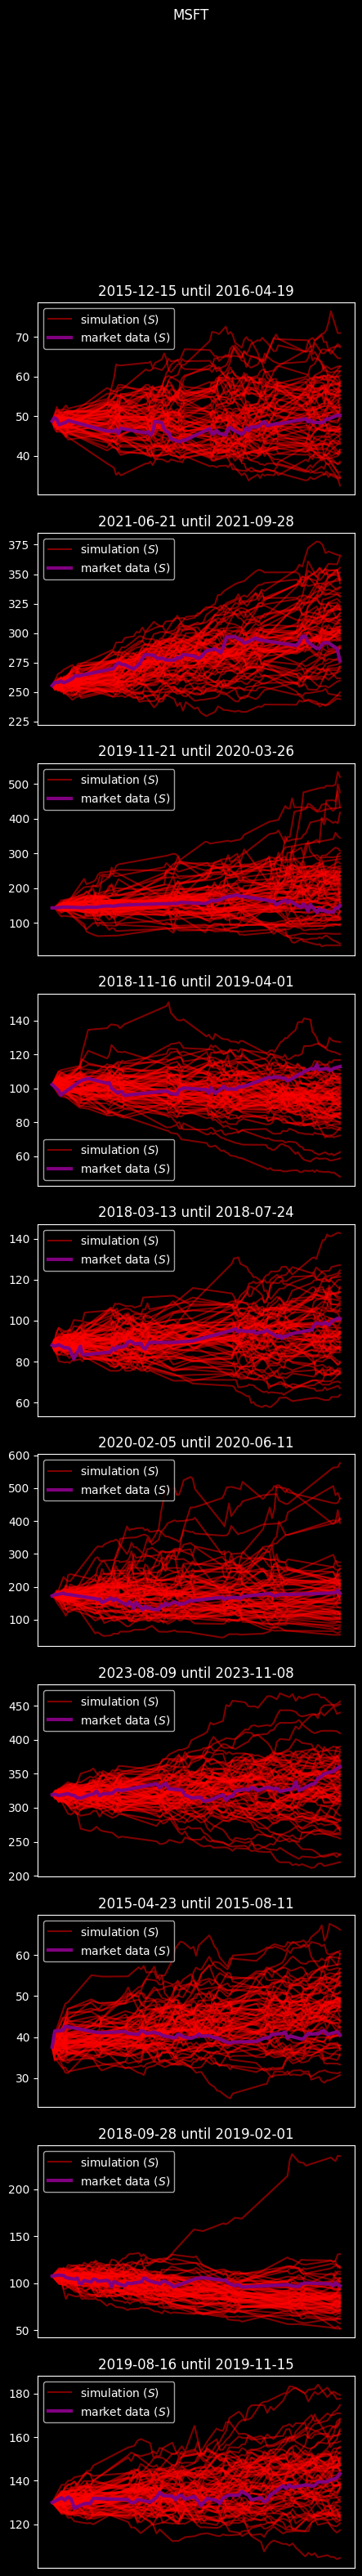

In [6]:
fig, axs = plt.subplots(len(trajectories), 1)
fig.set_size_inches(5, 36)
fig.suptitle(STOCK_NAME)

for i, (actual, predictions) in enumerate(actual_and_predictions):
    for j, prediction in enumerate(predictions[..., 0].transpose(0, 1)):
        axs[i].plot(actual.index, prediction.detach(), c="red", alpha=.5, label="simulation ($S$)" if j == 0 else None)
    axs[i].plot(actual.index, list(actual["S"]), c="purple", linewidth=3, label="market data ($S$)")
    axs[i].set_title(f"{actual.index[0].date()} until {actual.index[-1].date()}")
    axs[i].legend()
    axs[i].set_xticks([])

plt.show()